In [1]:
from kuzushiji import kuzushiji


In [2]:
from voicevox import voicevox
import wave
import io


In [3]:
text = "東風吹かば 匂ひおこせよ 梅の花 あるじなしとて 春な忘れそ"
name = "菅原道真"
voice = "四国めたん_ノーマル"
make_qrcode = False


In [ ]:
voice_dict = {
    "四国めたん_ノーマル": "2",
    "四国めたん_あまあま": "0",
    "四国めたん_ツンツン": "6",
    "四国めたん_セクシー": "4",
    "ずんだもん_ノーマル": "3",
    "ずんだもん_あまあま": "1",
    "ずんだもん_ツンツン": "7",
    "ずんだもん_セクシー": "5",
    "ずんだもん_ささやき": "22",
    "春日部つむぎ_ノーマル": "8",
    "雨晴はう_ノーマル": "10",
    "波音リツ_ノーマル": "9",
    "玄野武宏_ノーマル": "11",
    "白上虎太郎_ふつう": "12",
    "白上虎太郎_わーい": "32",
    "白上虎太郎_びくびく": "33",
    "白上虎太郎_おこ": "34",
    "白上虎太郎_びえーん": "35",
    "青山龍星_ノーマル": "13",
    "冥鳴ひまり_ノーマル": "14",
    "九州そら_ノーマル": "16",
    "九州そら_あまあま": "15",
    "九州そら_ツンツン": "18",
    "九州そら_セクシー": "17",
    "九州そら_ささやき": "19",
    "もち子さん_ノーマル": "20",
    "剣崎雌雄_ノーマル": "21",
    "WhiteCUL_ノーマル": "23",
    "WhiteCUL_たのしい": "24",
    "WhiteCUL_かなしい": "25",
    "WhiteCUL_びえーん": "26",
    "後鬼_人間ver.": "27",
    "後鬼_ぬいぐるみver.": "28",
    "No.7_ノーマル": "29",
    "No.7_アナウンス": "30",
    "No.7_読み聞かせ": "31",
}
voice_id = voice_dict[voice]


## 読み上げ

In [4]:
speakers = voicevox.Speaker(
    speaker_id=voice_id,
    text=text + " " + name,
)

speakers.speak_at_jupyter()


## 短歌画像

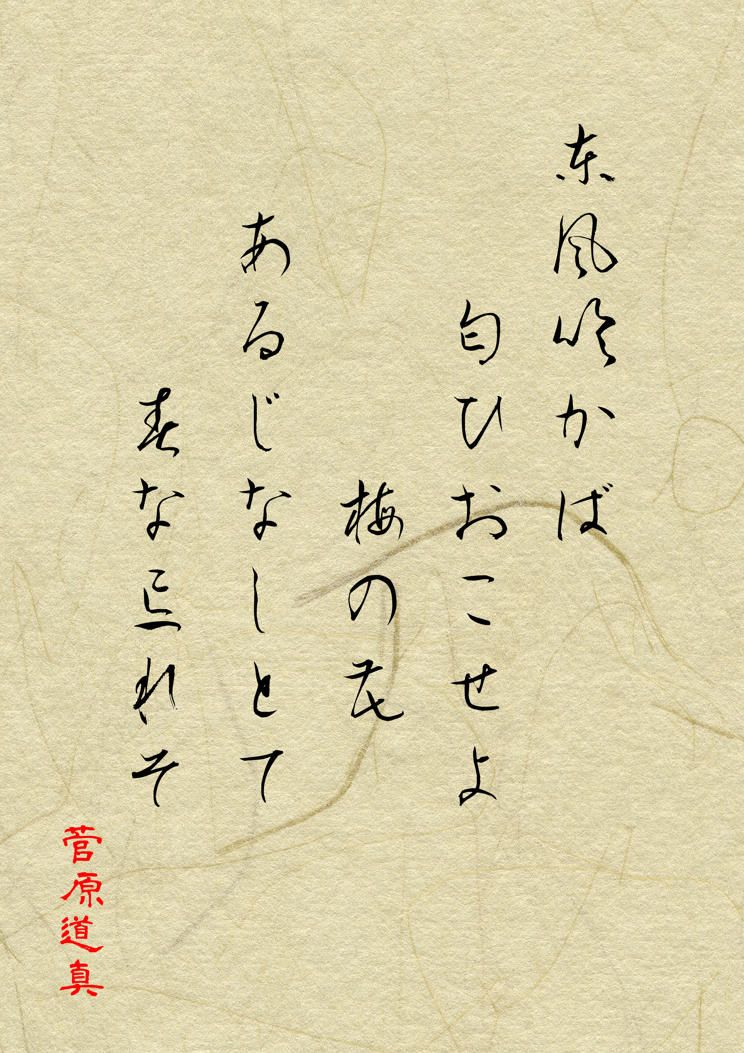

In [5]:
generator = kuzushiji.Whiter(
    text,
    font_path="/code/kuzushiji/font/KouzanBrushFontSousyo.ttf",
    image_path="/code/kuzushiji/background/japanese-paper_00096.jpg",
)
generator.draw_text()
# 署名を入力してください
if name != "":
    generator.sign(
        name,
        "/code/kuzushiji/font/aoyagireisyosimo_ttf_2_01.ttf",
    )
generator.rescale(0.3)
# ファイル名の入力
path = ""
output_path = generator.save(path)
generator.image


## ダウンロード

ここからダウンロードができます。

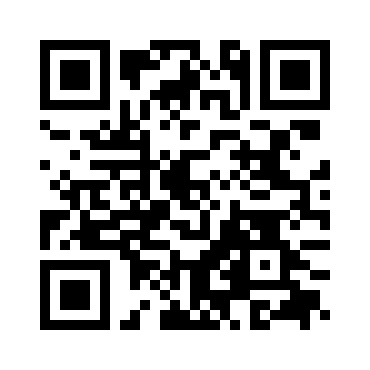

In [12]:
from imgur import api_wrapper
import base64
import qrcode

img = None
if make_qrcode:
    imgur = api_wrapper.ImgurAPIWrapper()
    img_bytes = io.BytesIO()
    image = generator.image
    image.save(img_bytes, format='PNG')
    img_bytes = img_bytes.getvalue()
    imgur_response = imgur.upload_image(
        base64.b64encode(
            img_bytes
        )
    )

    img = qrcode.make(imgur_response.get("data").get("link"))
    "hello"
img
